# Лабораторна робота 2. Аналіз даних мовою Python
# Ал Хадам Мурат ІП-13 - Варіант 15

In [1]:
import pandas as pd
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt


df = pd.read_csv('data/Budget.csv')
df

,Unnamed: 0,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,age,children
0,1,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,25,2
1,2,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,39,2
2,3,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,47,2
3,4,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,33,2
4,5,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,31,1
...,...,...,...,...,...,...,...,...,...,...,...
214,215,0.2864,0.1532,0.1863,0.0425,0.1564,0.1752,80,120,37,2
215,216,0.3427,0.0732,0.0129,0.2666,0.0003,0.3043,140,120,41,2
216,217,0.2955,0.0898,0.0247,0.1761,0.1408,0.2729,100,100,30,1
217,218,0.3380,0.0772,0.0751,0.1590,0.0848,0.2659,120,130,34,2


In [2]:
df = df.iloc[:, 1:]
df

,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,age,children
0,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,25,2
1,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,39,2
2,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,47,2
3,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,33,2
4,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,31,1
...,...,...,...,...,...,...,...,...,...,...
214,0.2864,0.1532,0.1863,0.0425,0.1564,0.1752,80,120,37,2
215,0.3427,0.0732,0.0129,0.2666,0.0003,0.3043,140,120,41,2
216,0.2955,0.0898,0.0247,0.1761,0.1408,0.2729,100,100,30,1
217,0.3380,0.0772,0.0751,0.1590,0.0848,0.2659,120,130,34,2


Рівень значущості

In [3]:
alpha = 0.05

## 1. Які середні витрати та їх середньоквадратичне відхилення?

In [4]:
spendings = df['totexp']
spendings

0       50
1       90
2      180
3       80
4       90
      ... 
214     80
215    140
216    100
217    120
218     70
Name: totexp, Length: 219, dtype: int64

In [5]:
print("Середнє значення витрат для кожної сім'ї:", round(spendings.mean(), 2))

Середнє значення витрат для кожної сім'ї: 96.03


In [6]:
print("Середньоквадратичне відхилення набору значень витрат:", round(spendings.std(), 2))

Середньоквадратичне відхилення набору значень витрат: 45.05


## 2. Перевірити чи нормально розподілений вік.

In [7]:
ages = df['age']
ages

0      25
1      39
2      47
3      33
4      31
       ..
214    37
215    41
216    30
217    34
218    30
Name: age, Length: 219, dtype: int64

### Висуваємо нульову гіпотезу H0: вік найстаршого в сім'ї розподілений нормально.
### Альтернативна гіпотеза Н1:  вік найстаршого в сім'ї розподілений не нормально.

In [8]:
test_age, p_value = stats.normaltest(ages)

print("Статистика:", test_age)

Статистика: 14.807729478754993


In [9]:
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу. Розподіл не є нормальним.")
else:
    print("Приймаємо нульову гіпотезу. Розподіл є нормальним.")

Відхиляємо нульову гіпотезу. Розподіл не є нормальним.


(array([ 4., 27., 38., 52., 37., 22., 10., 17.,  8.,  4.]),
 array([19., 23., 27., 31., 35., 39., 43., 47., 51., 55., 59.]),
 <BarContainer object of 10 artists>)

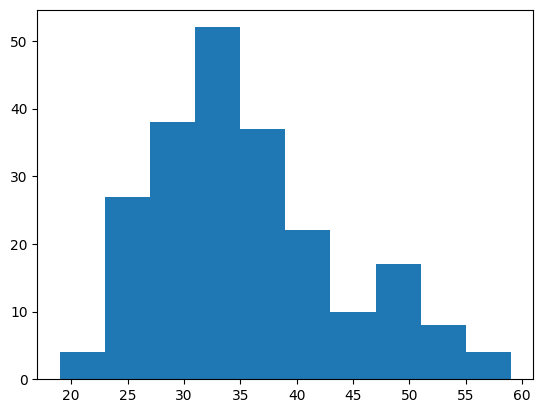

In [10]:
plt.hist(ages)

З гістограми розподілу справді бачимо, що вік розподіленний `не за нормальним законом`.

## 3. Чи є зв’язок між витратами на алкоголь та витратами на їжу?

In [11]:
for_alco = df['walc']
for_alco

0      0.0106
1      0.0825
2      0.0513
3      0.0397
4      0.1571
        ...  
214    0.0425
215    0.2666
216    0.1761
217    0.1590
218    0.0470
Name: walc, Length: 219, dtype: float64

In [12]:
for_food = df['wfood']
for_food

0      0.4272
1      0.3739
2      0.1941
3      0.4438
4      0.3331
        ...  
214    0.2864
215    0.3427
216    0.2955
217    0.3380
218    0.4854
Name: wfood, Length: 219, dtype: float64

Перевіримо чи розподілені нормально вибірки.

In [13]:
_, p_value_for_alco = stats.normaltest(for_alco)

if p_value_for_alco < alpha:
    print("Відхиляємо нульову гіпотезу. Розподіл не є нормальним.")
else:
    print("Приймаємо нульову гіпотезу. Розподіл є нормальним.")

Відхиляємо нульову гіпотезу. Розподіл не є нормальним.


In [14]:
_, p_value_for_food = stats.normaltest(for_food)

if p_value_for_food < alpha:
    print("Відхиляємо нульову гіпотезу. Розподіл не є нормальним.")
else:
    print("Приймаємо нульову гіпотезу. Розподіл є нормальним.")

Приймаємо нульову гіпотезу. Розподіл є нормальним.


Так як обоє наборів даних не розподілені за нормальним законом використаємо критерій Спірмену.

In [15]:
corr, p_value = stats.spearmanr(for_alco, for_food)

print("Коефіцієнт кореляції Спірмена:", corr)
print("P-значення:", p_value)

Коефіцієнт кореляції Спірмена: -0.15689005618238575
P-значення: 0.02018573778960892


In [16]:
if p_value < alpha:
    print("Кореляція між витратами на їжу та на алкоголь значуща.")
else:
    print("Кореляція між витратами на їжу та на алкоголь не значуща.")

Кореляція між витратами на їжу та на алкоголь значуща.


## 4. Перевірити за допомогою статистичних гіпотез чи більші витрати на транспорт в сім’ях з двома дітьми, ніж з однією.

In [17]:
with_1_children = df[df['children'] == 1]['wtrans']
with_1_children

4      0.2403
5      0.0955
6      0.0227
7      0.0000
8      0.0433
        ...  
205    0.1495
206    0.1526
207    0.1568
210    0.4713
216    0.1408
Name: wtrans, Length: 88, dtype: float64

In [18]:
with_2_childrens = df[df['children'] == 2]['wtrans']
with_2_childrens

0      0.1458
1      0.1215
2      0.2063
3      0.0652
10     0.0672
        ...  
213    0.0765
214    0.1564
215    0.0003
217    0.0848
218    0.0147
Name: wtrans, Length: 131, dtype: float64

In [19]:
print('Середнє значення витрат на транспорт, де 1 дитина:', mean(with_1_children))
print('Сумарне значення витрат на транспорт, де 1 дитина:', sum(with_1_children))
print('Середнє значення витрат на транспорт, де 2 дитини:', mean(with_2_childrens))
print('Сумарне значення витрат на транспорт, де 2 дитини:', sum(with_2_childrens))

Середнє значення витрат на транспорт, де 1 дитина: 0.119475
Сумарне значення витрат на транспорт, де 1 дитина: 10.513799999999998
Середнє значення витрат на транспорт, де 2 дитини: 0.12215725190839695
Сумарне значення витрат на транспорт, де 2 дитини: 16.002600000000008


### Нуᴫьова гіпотеза (H0)꞉ витрати на транспорт в сім’ях з двома і з однією дитиною однакові.
### Альтернативна гіпотеза (H1)꞉ витрати на транспорт в сім’ях з двома дітьми більші, ніж з однією дитиною.

In [20]:
t_statistic, p_value = stats.ttest_ind(with_1_children, with_2_childrens, alternative='less')


print("T-статистика:", t_statistic)
print("P-значення:", p_value)

T-статистика: -0.18650007392150153
P-значення: 0.4261134283731618


In [21]:
if p_value < alpha:
    print("Витрати на транспорт в сім’ях з двома дітьми більші, ніж з однією дитиною. (Відхиляємо нульову гіпотезу)")
else:
    print("Витрати на транспорт в сім’ях з двома і з однією дитиною однакові. (Приймаємо нульову гіпотезу - не має достатніх доказів)")

Витрати на транспорт в сім’ях з двома і з однією дитиною однакові. (Приймаємо нульову гіпотезу - не має достатніх доказів)
